In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import numpy as np
# various options in pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.precision', 3)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# TZ Explore

# Average entries per day, per station, as histogram

In [2]:
with open('../src/data/mta_data_march_cleaned.pickle', 'rb') as read_file:
    clean_columns=pickle.load(read_file)

***making a day of the week column called 'DAY'

In [3]:
clean_columns['DATE'] = clean_columns.start_datetime.dt.day_name
clean_columns['DATE'] = clean_columns.start_datetime.dt.day_name()
clean_columns['DAY'] = clean_columns['DATE']

# Station Totals By Date

In [4]:
daily_entries_by_station_by_date = (clean_columns
.groupby([clean_columns.start_datetime.dt.date,'STATION','DAY'])
 .agg({'entries':'sum'})
 .reset_index()
)

In [5]:
daily_entries_by_station_by_date

,start_datetime,STATION,DAY,entries
0,2019-02-23,1 AV,Saturday,2.000
1,2019-02-23,103 ST,Saturday,17980.000
2,2019-02-23,103 ST-CORONA,Saturday,13740.000
3,2019-02-23,104 ST,Saturday,2219.000
4,2019-02-23,110 ST,Saturday,6081.000
...,...,...,...,...
13207,2019-03-29,WOODLAWN,Friday,6256.000
13208,2019-03-29,WORLD TRADE CTR,Friday,16794.000
13209,2019-03-29,WTC-CORTLANDT,Friday,13077.500
13210,2019-03-29,YORK ST,Friday,10765.500


# Station Totals

In [6]:
station_totals = daily_entries_by_station_by_date.groupby(['STATION'],as_index=False).entries.sum()
station_totals


,STATION,entries
0,1 AV,520263.750
1,103 ST,927341.500
2,103 ST-CORONA,603951.646
3,104 ST,141300.300
4,110 ST,334892.725
...,...,...
373,WOODLAWN,206313.400
374,WORLD TRADE CTR,493869.138
375,WTC-CORTLANDT,407720.500
376,YORK ST,361510.000


# Station Totals By Day

In [7]:
daily_entries_by_station = (clean_columns
.groupby([clean_columns.start_datetime.dt.date,'STATION'])
 .agg({'entries':'sum'})
 .reset_index()
)

# Station Total By Daily Mean (all stations)

In [8]:
station_means_all = daily_entries_by_station.groupby(['STATION'],as_index=False).agg({'entries':'mean'}).sort_values('entries',ascending=False)
station_means_all

,STATION,entries
61,34 ST-PENN STA,149537.977
233,GRD CNTRL-42 ST,129537.846
59,34 ST-HERALD SQ,107105.581
46,23 ST,100961.983
14,14 ST-UNION SQ,90612.879
...,...,...
332,ROCKAWAY PARK B,565.471
148,BEACH 98 ST,389.057
162,BROAD CHANNEL,272.479
141,BEACH 105 ST,188.993


# Top 20 by Station Totals By Daily Mean

In [9]:
top_20_by_mean = daily_entries_by_station.groupby(['STATION'],as_index=False).agg({'entries':'mean'}).sort_values('entries',ascending=False).head(20)
top_20_by_mean

,STATION,entries
61,34 ST-PENN STA,149537.977
233,GRD CNTRL-42 ST,129537.846
59,34 ST-HERALD SQ,107105.581
46,23 ST,100961.983
14,14 ST-UNION SQ,90612.879
68,42 ST-PORT AUTH,90432.691
352,TIMES SQ-42 ST,88526.924
226,FULTON ST,81819.302
110,86 ST,74196.814
9,125 ST,70880.351


# Barh Graph: Top 20 Stations by daily mean

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text yticklabel objects>)

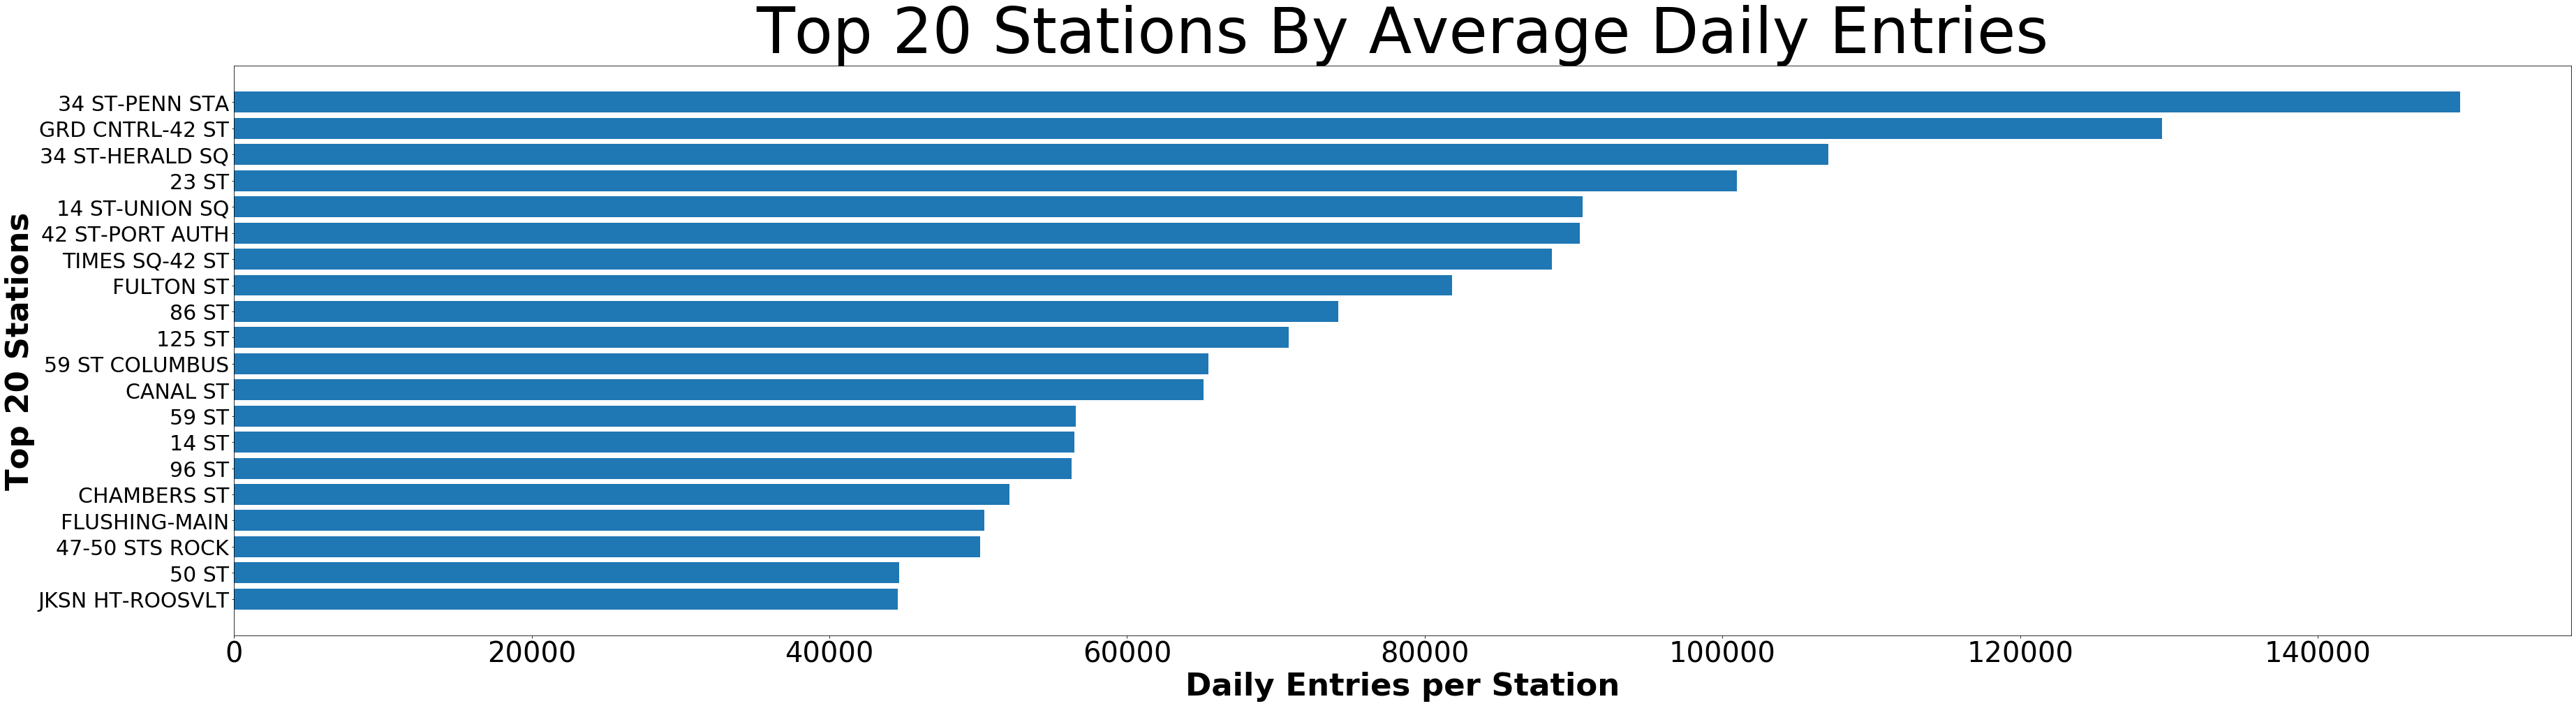

In [10]:
new_x = top_20_by_mean.STATION
new_y = top_20_by_mean.entries
#plt.figure(figsize=[480,800])
plt.figure(figsize=(60, 15))

#fig, ax = plt.subplots(20, 5, figsize=(75, 100))

#plt.ax.invert_yaxis()
#plt.subplot(20,5,2)

plt.barh(new_x,new_y)

plt.gca().invert_yaxis()

plt.title('Top 20 Stations By Average Daily Entries',family='sans serif',fontsize = 90,loc='center');
plt.xlabel('Daily Entries per Station',fontsize = 45, weight = 'bold')
plt.ylabel('Top 20 Stations',fontsize = 45, weight = 'bold')
plt.xticks(fontsize=40)
plt.yticks(fontsize=30)

#plt.savefig('../src/visualization/top_20.jpg',quality=95)

# Bar Graph All Stations by Average Daily Entries

# Daily Traffic (All Stations), by daily traffic (Plot 1)

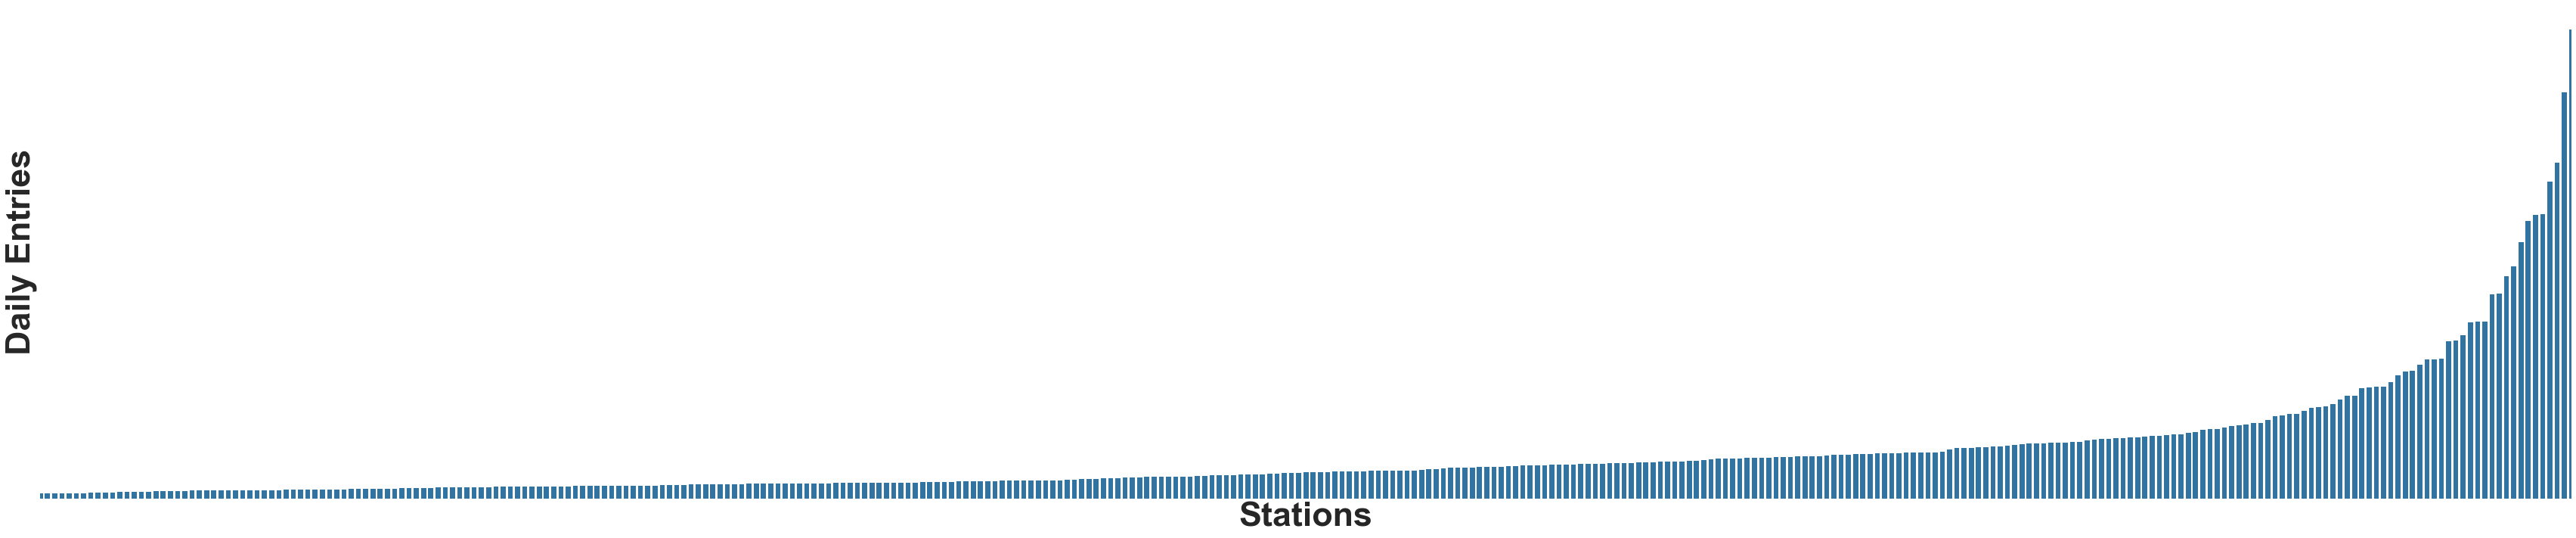

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(60, 12))

# Load the data
data = station_means_all
data2 = top_20_by_mean

# Plot the data
sns.set_color_codes("bright")
sns.barplot(x="STATION", y="entries", data=data,
            label="Others", color="tab:blue")

#remove all axis markers
plt.xticks([])
plt.yticks([])
plt.xlabel('Stations',fontsize = 45, weight = 'bold')
plt.ylabel('Daily Entries',fontsize = 45, weight = 'bold')


# Add a legend and informative axis label
ax.set(xlim=(350,0))
sns.despine(left=True, bottom=True)
#plt.savefig('../src/visualization/dailytraffic1.jpg',quality=95)

# Daily Traffic (All Stations, top 20 in red), by daily traffic (Plot 2)

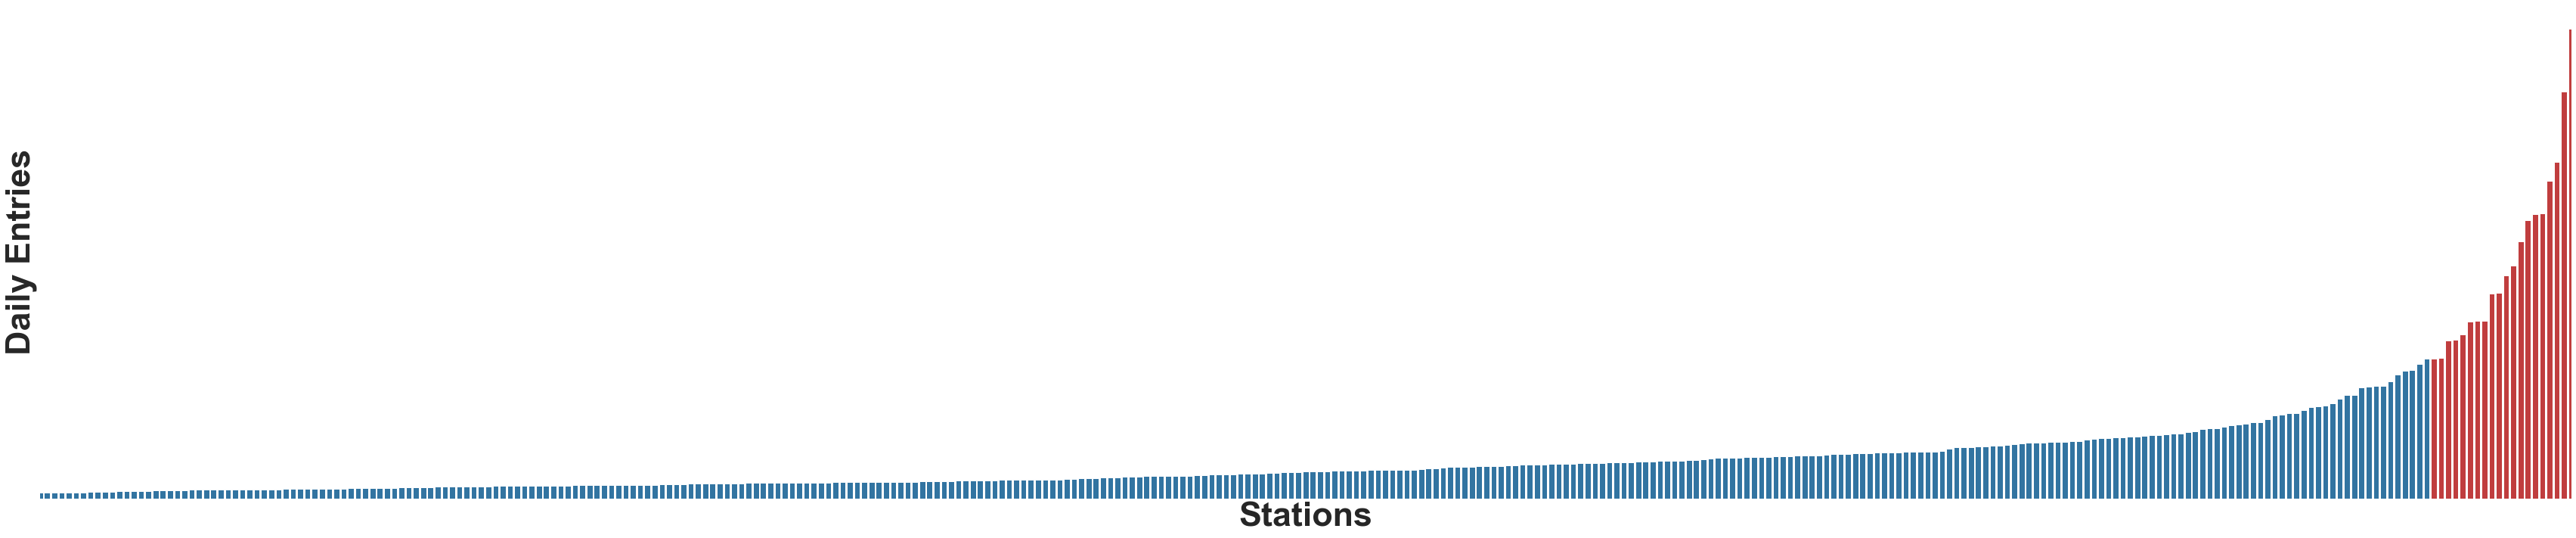

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(60, 12))

# Load the data
data = station_means_all
data2 = top_20_by_mean

# Plot the data
sns.set_color_codes("bright")
sns.barplot(x="STATION", y="entries", data=data,
            label="Others", color="tab:blue")

#Plot the top-20 data
sns.set_color_codes("bright")
sns.barplot(x="STATION", y="entries", data=data2,
           label="Top 20 Stations", color="tab:red")

#Remove axis markers
plt.xticks([])
plt.yticks([])
plt.xlabel('Stations',fontsize = 45, weight = 'bold')
plt.ylabel('Daily Entries',fontsize = 45, weight = 'bold')


# Add a legend and informative axis label
#ax.legend(ncol=378, loc="upper right", frameon=True)
ax.set(xlim=(350,0))
sns.despine(left=True, bottom=True)
#plt.savefig('../src/visualization/dailytraffic1.jpg',quality=95)
